In [1]:
import os
os.chdir('..')

from copy import deepcopy

import numpy as np
from matplotlib import pyplot as plt
from utils import wandb_restore

import pandas as pd
import seaborn as sns

In [3]:
# Fill in the wandb_id assigned to your demo runs!

runs = {
    'Discrete Semantic Entropy': 'YOUR_ID_1',
    'P(True) - Kadavath et al. variant': 'YOUR_ID_1',
    'Self-check Baseline': 'YOUR_ID_3',
}
if any(['YOUR_ID' in v for v in runs.values()]):
    raise ValueError('Need to provide wandb_id of runs!')

project = 'long_hallu'
runs = {k: f'{project}/{v}' for k, v in runs.items()}


all_results, all_metrics = {}, {}
for name, url in runs.items():
    results, config = wandb_restore(url, 'results.pkl')
    all_results[name] = results
    all_metrics[name] = results['results']['metrics']


In [4]:
wrongness = ['major_only', 'minor_and_major']
allms = deepcopy(all_metrics)
data = []
for run in allms:
    for wrong in wrongness:
        allms[run][wrong]['uncertainty']['accuracy_at_1_answer_fraction'] = allms[run][wrong]['performance']
        for metric in allms[run][wrong]['uncertainty']:
            m = allms[run][wrong]['uncertainty'][metric]['mean']
            data.append([run, wrong, metric, m])
df = pd.DataFrame(data, columns=['run', 'wrong', 'metric', 'value'])

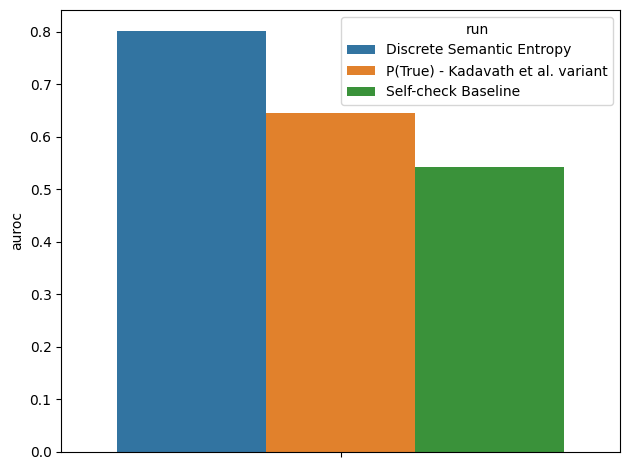

In [5]:
metric = 'auroc'
plot_df = df.set_index('metric').loc[metric].set_index('wrong').loc['minor_and_major']

g = sns.barplot(
    # x="run",
    y="value",
    hue="run",
    data=plot_df,
)
g.set_ylabel(metric)
plt.tight_layout()